In [318]:
import pandas as pd
data=pd.read_csv('/Users/akshanshshukla/Downloads/tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [320]:
#hashtags, url's, numbers, user  etc. ye sab delete kar denge
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [321]:
data.drop(['id'],axis=1,inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [322]:
data['label'].value_counts(normalize=True)
#not very balanced data

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

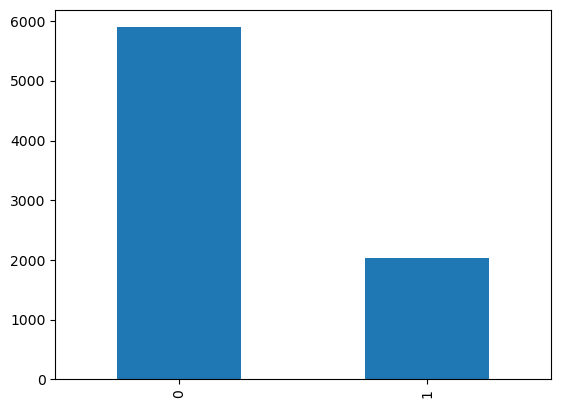

In [323]:
data['label'].value_counts().plot(kind='bar')

## data cleaning

In [325]:
import  re

In [326]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [327]:
#substitute 's' with ' is'
re.sub(r"'s\b"," is",data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

### user mentions are also there in some tweets

In [329]:
data['tweet'][11]
# @Apple h jaise idhar

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [330]:
#removing username
re.sub('@[A-Za-z0-9]+', "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [331]:
#removing hashtags
re.sub('#',"",data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [332]:
#removing hyperlinks
re.sub(r'http\S+',"",data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [333]:
#retaining alphabets(get rid of punctuations, special char, digits)
re.sub(r'[^a-zA-Z]'," ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

## stop words removal

In [335]:
import nltk
from nltk.corpus import stopwords

In [336]:
nltk_stopwords=set(stopwords.words('english'))
nltk_stopwords
#these are all neutral words, these don't decide whether the sentiment will be +ve/-ve
#toh htaa dene ka

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [337]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords=set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'yet', 'however', 'thereafter', 'his', 'hundred', 'than', 'nobody', 'sincere', 'whereupon', 'become', 'seems', 'up', 'their', 'no', 'hasnt', 'down', 'empty', 'give', 'these', 'would', 'have', 'everything', 'are', 'yourself', 'along', 'amount', 'back', 'which', 'due', 'very', 'whence', 'own', 'nothing', 'amongst', 'too', 'what', 'except', 'eg', 'eleven', 'amoungst', 'call', 'not', 'it', 'until', 'latterly', 'seem', 'here', 'might', 'all', 'fifty', 'formerly', 'between', 'almost', 'noone', 'find', 'is', 'thin', 'none', 'and', 'herein', 'ie', 'thereupon', 'sometime', 'every', 'somewhere', 'must', 'across', 'above', 'now', 'from', 'sometimes', 'among', 'whereby', 'you', 'something', 'each', 'else', 'they', 'bill', 'for', 'further', 'others', 'our', 'been', 'upon', 'somehow', 'wherever', 'but', 'wherein', 'whatever', 'elsewhere', 'without', 'on', 'or', 'itself', 'where', 'again', 'several', 'though', 'onto', 'whoever', 'hence', 'system', 'well', 'already', 'could', 'former', 'me', 'since',

In [338]:
#find common stopwords from both nltk_stopwords and sklearn_stopwords
print(nltk_stopwords.intersection(sklearn_stopwords))

{'nor', 'there', 'them', 'his', 'can', 'ourselves', 'than', 're', 'her', 'up', 'their', 'who', 'most', 'so', 'yours', 'both', 'no', 'the', 'down', 'in', 'these', 'himself', 'was', 'have', 'are', 'yourself', 'why', 'which', 'very', 'if', 'own', 'before', 'this', 'too', 'off', 'him', 'what', 'once', 'by', 'not', 'it', 'until', 'about', 'should', 'here', 'i', 'some', 'any', 'all', 'into', 'below', 'between', 'is', 'and', 'we', 'that', 'its', 'more', 'above', 'few', 'now', 'from', 'out', 'you', 'each', 'they', 'for', 'such', 'further', 'an', 'our', 'been', 'he', 'but', 'will', 'a', 'on', 'or', 'itself', 'where', 'again', 'do', 'hers', 'as', 'were', 'she', 'me', 'over', 'herself', 'other', 'had', 'those', 'your', 'during', 'because', 'to', 'of', 'whom', 'my', 'after', 'yourselves', 'myself', 'themselves', 'with', 'only', 'same', 'ours', 'am', 'under', 'when', 'be', 'against', 'how', 'at', 'while', 'has', 'then', 'being', 'through'}


In [339]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

### combining stopwords from nltk and sklearn

In [341]:
combined_stopwords=nltk_stopwords.union(sklearn_stopwords)

### text normalization:stemming or Lemmatization

In [343]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [344]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [345]:
new_sent=''

for token in data['tweet'][63].split():
    new_sent=new_sent+lemmatizer.lemmatize(token.lower()) + ' '
new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [346]:
!pip install contractions

In [347]:
import contractions

In [348]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [349]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

## define the cleaner function 

In [351]:
def tweet_cleaner_without_stopwords(text):
    new_text=re.sub(r"'s\b", " is", text)
    new_text=re.sub('#',"",new_text)
    new_text=re.sub("@[A-Za-z0-9]+",'',new_text)
    new_text=re.sub(r'http\S+','',new_text)
    new_text=contractions.fix(new_text)
    new_text=re.sub(r'[^a-zA-Z]',' ',new_text)
    new_text=new_text.lower().strip()


    cleaned_text=''
    for token in new_text.split():
        cleaned_text=cleaned_text+lemmatizer.lemmatize(token)+' '
    return cleaned_text

In [352]:
cleaned_tweets=[]

for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))


cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [353]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [354]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

## adding this cleaned tweets as a column

In [356]:
data['cleaned_tweets_w/o_stopwords']=cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...
4,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...


## data visualization

## plot the 25 most common words in the dataset

### write a code to collect all the words from all the tweets into a single list

In [360]:
all_words=[]
for t in data['tweet']:
    all_words.extend(t.split())
all_words[:35]

['#fingerprint',
 '#Pregnancy',
 'Test',
 'https://goo.gl/h1MfQV',
 '#android',
 '#apps',
 '#beautiful',
 '#cute',
 '#health',
 '#igers',
 '#iphoneonly',
 '#iphonesia',
 '#iphone',
 'Finally',
 'a',
 'transparant',
 'silicon',
 'case',
 '^^',
 'Thanks',
 'to',
 'my',
 'uncle',
 ':)',
 '#yay',
 '#Sony',
 '#Xperia',
 '#S',
 '#sonyexperias…',
 'http://instagram.com/p/YGEt5JC6JM/',
 'We',
 'love',
 'this!',
 'Would',
 'you']

In [361]:
len(set(all_words))

34348

In [362]:
import matplotlib.pyplot as plt

## frequency distribution

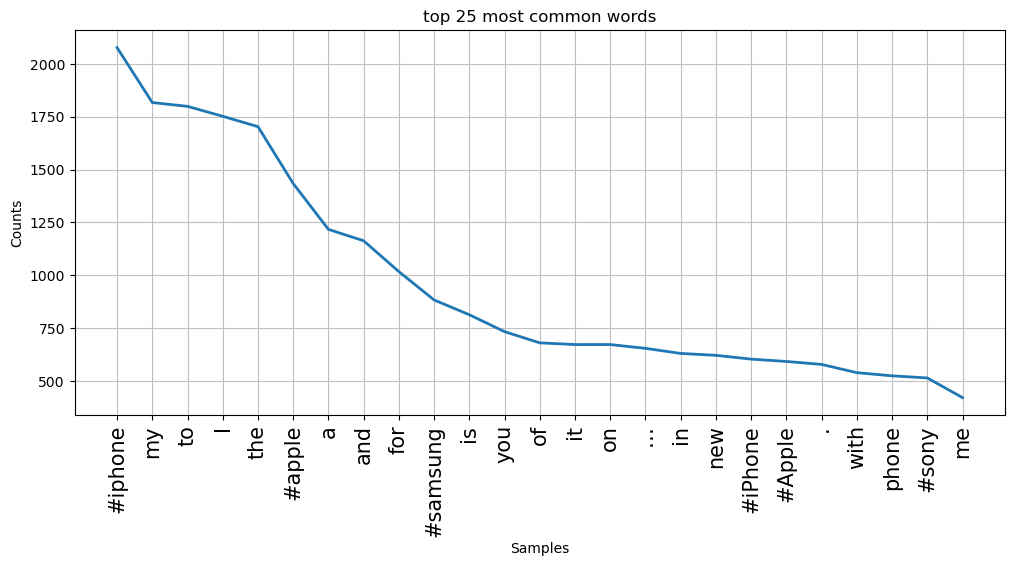

In [364]:
freq_dist=nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False)

plt.show()

## lot of useless words here, like I,a,and,for,is,you etc. isse kuch info n mil rha hai

## plot for cleaned tweets

In [367]:
all_cleaned_words=[]
for k in data['cleaned_tweets_w/o_stopwords']:
    all_cleaned_words.extend(k.split())
all_cleaned_words[:30]

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'a',
 'transparant',
 'silicon',
 'case',
 'thanks',
 'to',
 'my',
 'uncle',
 'yay',
 'sony',
 'xperia',
 's',
 'sonyexperias',
 'we',
 'love',
 'this',
 'would']

In [368]:
len(set(all_cleaned_words))

15981

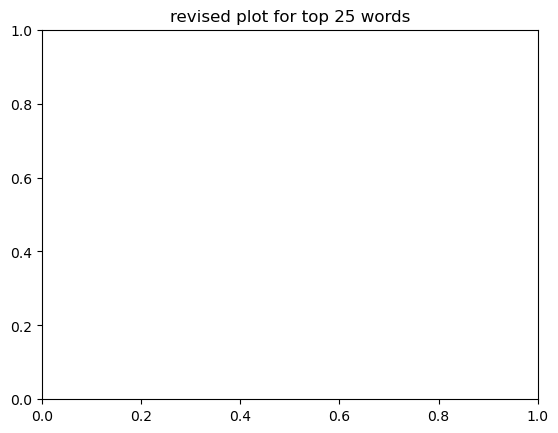

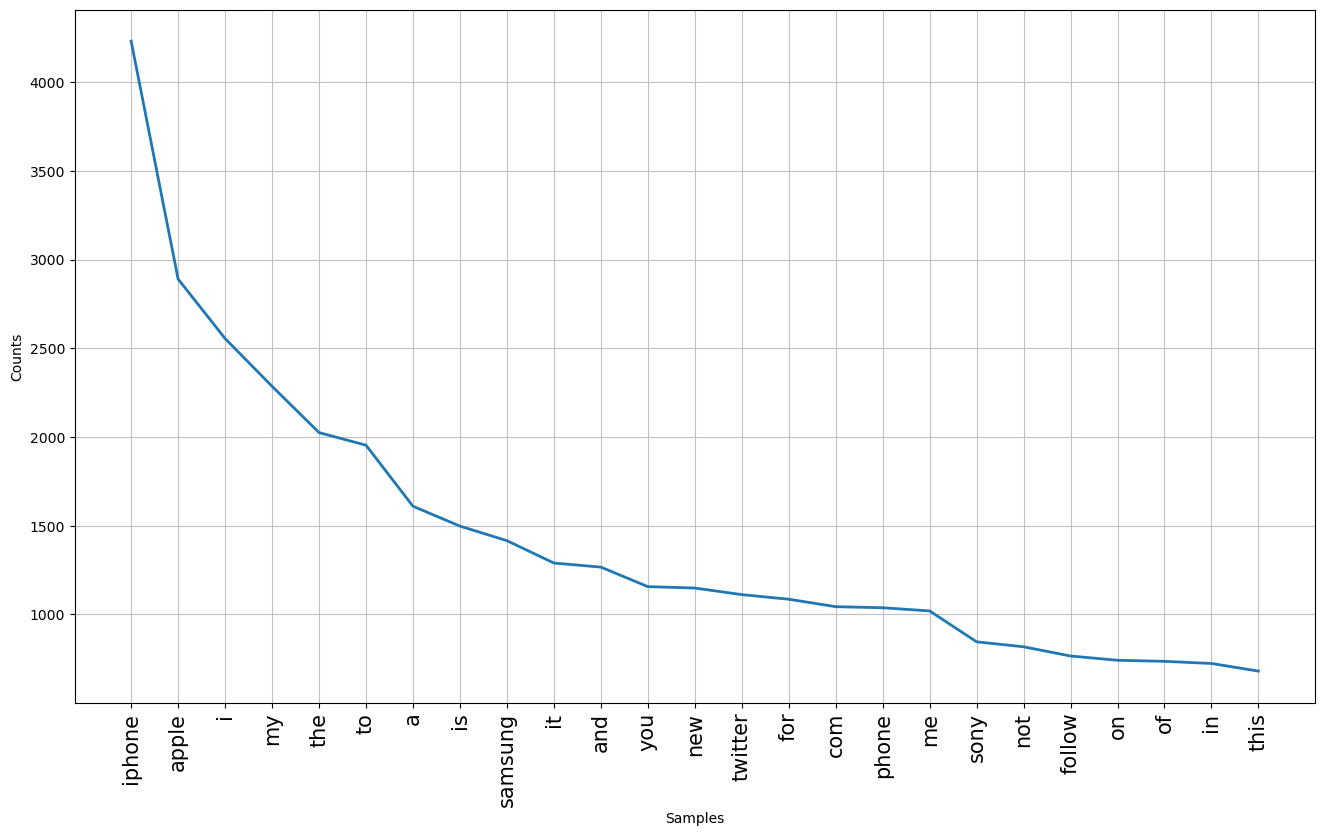

In [369]:
freq_distribn=nltk.FreqDist(all_cleaned_words)

plt.title('revised plot for top 25 words')
plt.figure(figsize=(16,9))
plt.xticks(fontsize=15)
freq_distribn.plot(25,cumulative=False)
plt.show()

# after applying stop words

In [371]:
def tweet_cleaner_with_stopwords(text):
    new_text=re.sub(r"'s\b", " is", text)
    new_text=re.sub('#',"",new_text)
    new_text=re.sub("@[A-Za-z0-9]+",'',new_text)
    new_text=re.sub(r'http\S+','',new_text)
    new_text=contractions.fix(new_text)
    new_text=re.sub(r'[^a-zA-Z]',' ',new_text)
    new_text=new_text.lower().strip()

    new_text=[token for token in new_text.split() if token not in combined_stopwords]

    new_text=[token for token in new_text if len(token)>2]


    
    cleaned_text=''
    for token in new_text:
        cleaned_text=cleaned_text+lemmatizer.lemmatize(token)+' '
    return cleaned_text

In [372]:
clean_tweets=data['tweet'].apply(tweet_cleaner_with_stopwords)
print(clean_tweets[:10])

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love talk makememories unplug relax iphone sma...
3     wired know george way iphone cute daventry home 
4    amazing service apple talk question unless pay...
5    iphone software update fucked phone big time s...
6       happy instapic instadaily sony xperia xperiaz 
7    new type charger cable bay amazon etsy new yea...
8    bout shopping listening music iphone justme mu...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object


In [373]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_stopwords'], dtype='object')

In [374]:
data['cleaned_tweets_with_stopwords']=data['tweet'].apply(tweet_cleaner_with_stopwords)
data.head()

,label,tweet,cleaned_tweets_w/o_stopwords,cleaned_tweets_with_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love talk makememories unplug relax iphone sma...
3,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,amazing service apple talk question unless pay...


### plotting now

In [376]:
all_words=[]
for k in data['cleaned_tweets_with_stopwords']:
    all_words.extend(k.split())
all_words

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'transparant',
 'silicon',
 'case',
 'thanks',
 'uncle',
 'yay',
 'sony',
 'xperia',
 'sonyexperias',
 'love',
 'talk',
 'makememories',
 'unplug',
 'relax',
 'iphone',
 'smartphone',
 'wifi',
 'connect',
 'wired',
 'know',
 'george',
 'way',
 'iphone',
 'cute',
 'daventry',
 'home',
 'amazing',
 'service',
 'apple',
 'talk',
 'question',
 'unless',
 'pay',
 'stupid',
 'support',
 'iphone',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'stupid',
 'iphones',
 'happy',
 'instapic',
 'instadaily',
 'sony',
 'xperia',
 'xperiaz',
 'new',
 'type',
 'charger',
 'cable',
 'bay',
 'amazon',
 'etsy',
 'new',
 'year',
 'rob',
 'cross',
 'toby',
 'young',
 'evemun',
 'mcmafia',
 'taylor',
 'spectre',
 'newyear',
 'starting',
 'recipe',
 'technology',
 'samsunggalaxys',
 'iphonex',
 'pic',
 'twitter',
 'com',
 'pjiwq',
 'wtc',

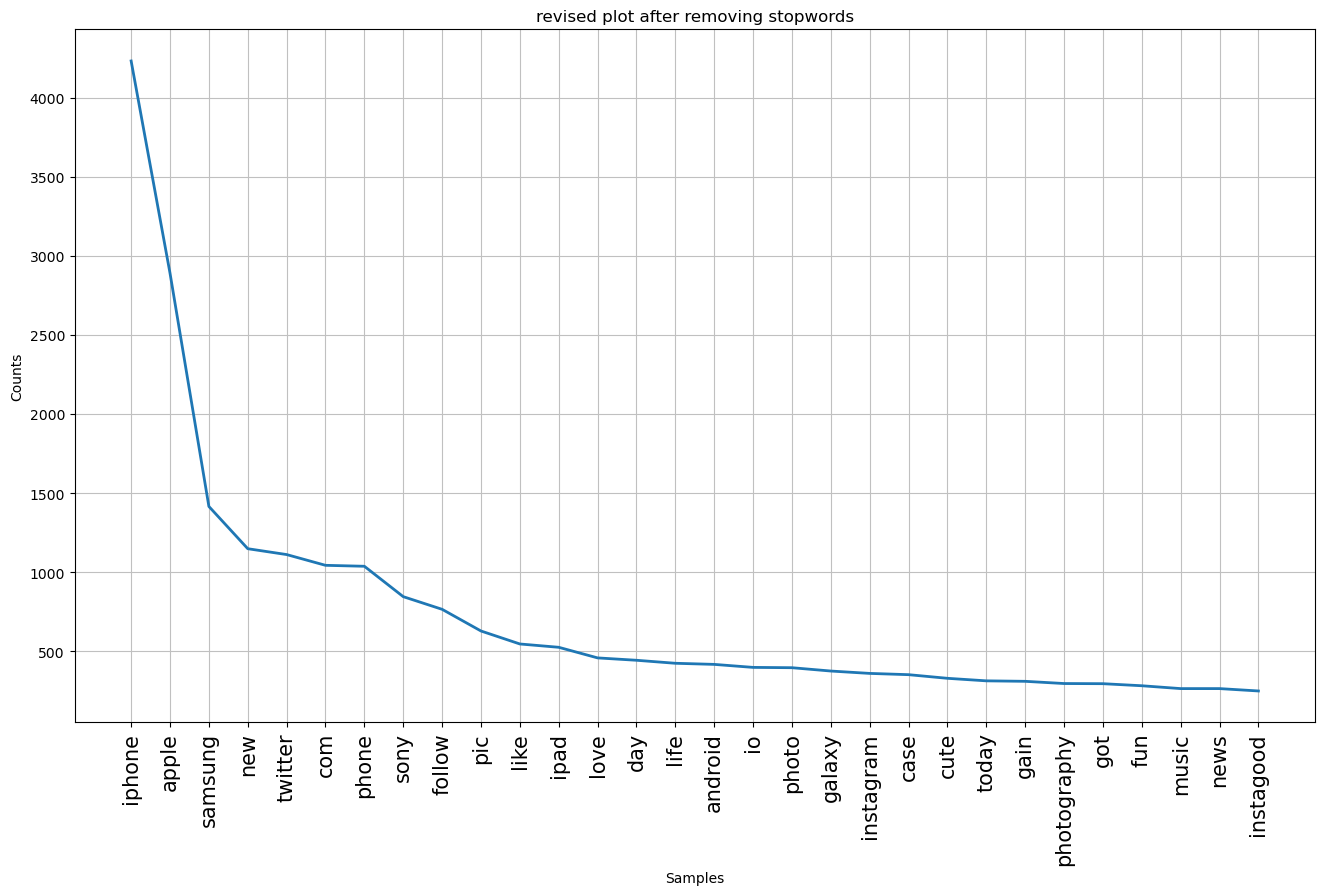

<Axes: title={'center': 'revised plot after removing stopwords'}, xlabel='Samples', ylabel='Counts'>

In [377]:
freq_dist=nltk.FreqDist(all_words)

plt.figure(figsize=(16,9))
plt.title('revised plot after removing stopwords')
plt.xticks(fontsize=15)

freq_dist.plot(30,cumulative=False)

## abhi bhi aise words h jinse semantic meaning jyada convey nhi ho rha hai

In [379]:
domain_specific_stopwords=['phone','mobile','twitter','rt','com','follow']
final_stopwords=domain_specific_stopwords+list(combined_stopwords)

## HW: REDO THE CLEANER FUNCTION TO INCLUDE FINAL_STOPWORDS AND REPLOT

## FEATURE EXTRACTION: Bag of Words

# countvectorizer and TF-IDF Vectorizer are there mainly in bag of words

In [383]:
from sklearn.feature_extraction.text import CountVectorizer

In [384]:
cv=CountVectorizer()

In [385]:
cv_features=cv.fit_transform(data['cleaned_tweets_w/o_stopwords'])

In [386]:
cv_features.shape

(7920, 15955)

In [387]:
#this includes stop words

In [388]:
cv_features[0]
#sparse matrix=a matrix with a lot of 0's

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [389]:
type(cv_features[0])
#csr=compressed sparse row matrix

scipy.sparse._csr.csr_matrix

In [390]:
cv_features[0].todense() #decompressing the csr data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [391]:
import pandas as pd
df=pd.DataFrame(cv_features.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [392]:
df.size/1e6 #these many elements are present in , 124 million

126.3636

In [393]:
import numpy as np
np.count_nonzero(df) #no. of non-zero elements in df

114973

In [394]:
(np.count_nonzero(df)/df.size)*100

0.09098585352110893

## 0.06% elements are non-zero, this is mind-boggling even for a machine to learn something from the data

In [396]:
cv.get_feature_names_out()[:50] #these are vocabulary words, total vocab words=15715, upar dekho

array(['aa', 'aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl',
       'aarhus', 'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal',
       'aaydojbfkq', 'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb',
       'abc', 'abdou', 'abe', 'aber', 'abercrombie', 'abi', 'ability',
       'abit', 'able', 'ableton', 'abnqum', 'aboard', 'about',
       'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight',
       'above', 'abp', 'abscbn', 'absence', 'absolute', 'absolutely',
       'absurd', 'abu', 'abudhabi', 'abuja', 'abujacity', 'abujafct',
       'abujapeople', 'abujaphones'], dtype=object)

In [397]:
cv_features[10].todense() #11th tweet hai ye jaise, pr isse kuch samajh nhi aa rha

matrix([[0, 0, 0, ..., 0, 0, 0]])

### converting tweets from numbers to words

In [399]:
cv.inverse_transform(np.asarray(cv_features[10].todense()))

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

# model building

In [401]:
from sklearn.model_selection import train_test_split

In [402]:
X_train,X_test,y_train,y_test=train_test_split(cv_features, data['label'],test_size=0.25,stratify=data['label'],random_state=42)

In [403]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_stopwords',
       'cleaned_tweets_with_stopwords'],
      dtype='object')

In [404]:
# stratify=data['label']
# ⚠️ Super important when labels are imbalanced.

# Iska matlab: training aur test set dono me labels ka proportion same rahega.

# For example:

# Agar original dataset me 70% positive, 30% negative hai

# To train & test dono me ye ratio maintain hoga

# 📌 Prevents biased models that see only one type of class in training/testing.

In [405]:
from sklearn.linear_model import LogisticRegression

In [406]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [407]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9779461279461279
0.8813131313131313


In [408]:
# Why Logistic Regression for Tweet Classification?
# Reason	Explanation
# 🧠 Simple yet powerful	Fast to train, especially for high-dimensional sparse data (like vectorized text)
# 💬 Works well on BoW/TF-IDF	Text data ko vector (bag-of-words, tf-idf) me convert karte hi ye model perfect fit hota hai
# ⚡ Fast + interpretable	Results explain karna easy hota hai (e.g., which words increase spam chance)
# ✅ Good baseline	Often used as first model in NLP tasks to benchmark performance
# # 📊 Outputs probabilities	Useful for tasks like sentiment scoring, spam thresholding

## overfitting ho rha hai full power, 1-2% ka diff chalta hai idhar 10% ka hai lagbhag

## model ko consistent bnana h taaki future mein similar dataset aaye toh accuracy itni hi aaye, we use cross-validation for it

### excessive number of features is root cause of overfitting, jitna info chahiye usse jyada hai machine k paas

## regularization kar sakte hai fir ab

In [413]:
#L1-REGULARIZATION, lasso
lr1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.6)
lr1.fit(X_train,y_train)

print(lr1.score(X_train,y_train))
print(lr1.score(X_test,y_test))

0.9181818181818182
0.8823232323232323


### less overfitted model h ab, C ko badal badal k check karne ka

## cross validation

In [416]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [417]:
X=cv_features
y=data['label']

## cross validation on l1 model

In [419]:
lr1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.6)
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results=cross_val_score(lr1,X,y,cv=kfold,scoring='accuracy')

In [420]:
print(results)
print(np.round((results.mean())*100,2), np.round((results.std())*100,2))

[0.89267677 0.87436869 0.87941919 0.89772727 0.89078283]
88.7 0.87


### avg accuracy for all 5 folds is 87.22% and deviation is 1.16, toh acc=87.22+/- 1.16

### for training score use cross validate function

In [423]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results=cross_validate(lr1,X,y,cv=kfold,scoring='accuracy',return_train_score=True)

In [424]:
results

{'fit_time': array([0.01929188, 0.01700974, 0.01723289, 0.01778603, 0.01982999]),
 'score_time': array([0.00050807, 0.00038123, 0.00041795, 0.00043988, 0.00043583]),
 'test_score': array([0.89267677, 0.87436869, 0.87941919, 0.89772727, 0.89078283]),
 'train_score': array([0.91650884, 0.9196654 , 0.91366793, 0.9146149 , 0.91398359])}

In [425]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100,2), np.round((results['train_score'].std())*100,2))

[0.91650884 0.9196654  0.91366793 0.9146149  0.91398359]
91.57 0.22


In [426]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100,2), np.round((results['test_score'].std())*100,2))

[0.89267677 0.87436869 0.87941919 0.89772727 0.89078283]
88.7 0.87


## hyperparameter tuning of the LR1 MODEL

In [428]:
from sklearn.model_selection import GridSearchCV

In [429]:
lr1=LogisticRegression(class_weight='balanced',penalty='l1',solver='liblinear')
c_values=np.arange(0.00001,1,0.05) #20 values

grid=GridSearchCV(estimator=lr1,param_grid={'C':c_values},cv=kfold, scoring='accuracy',\
                 return_train_score=True, verbose=2, n_jobs=-1)
grid_results=grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [430]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [431]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8905303030303029, 19)

In [432]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [433]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88156566, 0.88282828, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88876263, 0.88926768,
       0.88901515, 0.88939394, 0.8895202 , 0.89002525, 0.8905303 ])

In [434]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.85      , 0.86998106, 0.8803346 , 0.88712121,
       0.89232955, 0.89649621, 0.90094697, 0.90501894, 0.90811237,
       0.91003788, 0.91344697, 0.91568813, 0.91859217, 0.92130682,
       0.92332702, 0.92604167, 0.92856692, 0.93055556, 0.93282828])

In [435]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.05303030303028

In [436]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

93.28282828282829

In [437]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6616450760895921

## firse bc mean_train_acc and mean_test_acc mein 4% se jyada ka diff aa gaya, std bhi jyada hi hai, pichle waale se bhi chodu ,odel h 

## model inconsistent bhi h, inc of 3 in std devn-->inc. of 9 in variance

## create a pipeline and cross validate

In [441]:
from sklearn.pipeline import make_pipeline, Pipeline

In [442]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_stopwords',
       'cleaned_tweets_with_stopwords'],
      dtype='object')

In [443]:
X=data['cleaned_tweets_w/o_stopwords']
y=data['label']

cv=CountVectorizer()

lr2=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.6)

cv_pipe=Pipeline([('CV',cv),('LR',lr2)])

results=cross_val_score(cv_pipe, X,y,cv=kfold,scoring='accuracy')

print(np.round((results.mean())*100,2), np.round((results.std())*100,2))



88.7 0.87


In [444]:
cv_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.6, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [445]:
cv_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [446]:
len(cv_pipe['CV'].vocabulary_)

15955

In [447]:
cv_pipe['CV'].vocabulary_

{'fingerprint': 4549,
 'pregnancy': 10875,
 'test': 13759,
 'android': 452,
 'apps': 666,
 'beautiful': 1206,
 'cute': 3020,
 'health': 5925,
 'igers': 6443,
 'iphoneonly': 7021,
 'iphonesia': 7034,
 'iphone': 6985,
 'finally': 4533,
 'transparant': 14200,
 'silicon': 12511,
 'case': 2142,
 'thanks': 13801,
 'to': 14056,
 'my': 9244,
 'uncle': 14526,
 'yay': 15688,
 'sony': 12834,
 'xperia': 15608,
 'sonyexperias': 12844,
 'we': 15105,
 'love': 8232,
 'this': 13920,
 'would': 15487,
 'you': 15794,
 'go': 5354,
 'talk': 13571,
 'makememories': 8448,
 'unplug': 14590,
 'relax': 11533,
 'smartphone': 12681,
 'wifi': 15302,
 'connect': 2706,
 'am': 378,
 'wired': 15347,
 'know': 7628,
 'george': 5191,
 'wa': 14976,
 'made': 8389,
 'that': 13812,
 'way': 15085,
 'daventry': 3132,
 'home': 6127,
 'what': 15205,
 'amazing': 389,
 'service': 12292,
 'apple': 583,
 'will': 15312,
 'not': 9706,
 'even': 4148,
 'me': 8636,
 'about': 31,
 'question': 11224,
 'have': 5874,
 'unless': 14579,
 'pay':

# LR model with vs without stop_words

In [550]:
X=data['cleaned_tweets_w/o_stopwords']
y=data['label']

cv=CountVectorizer(stop_words=final_stopwords) # b4 creating vocab, stopwords is applied

lr2=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.6)

cv_pipe=Pipeline([('CV',cv),('LR',lr2)])

results=cross_val_score(cv_pipe, X,y,cv=kfold,scoring='accuracy')

print(np.round((results.mean())*100,2), np.round((results.std())*100,2))

cv_pipe.fit(X,y)

len(cv_pipe['CV'].vocabulary_)



87.16 0.79


15673

## keval 300 lagbhag words kam hue aur acc dropped by 2%

## stopwords hataye toh accuracy gir gawa

In [553]:
X=data['cleaned_tweets_w/o_stopwords']
y=data['label']

cv=CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)

#min document freq jinki 10 hogi unhi ko lene ka

lr2=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.6)

cv_pipe=Pipeline([('CV',cv),('LR',lr2)])

results=cross_val_score(cv_pipe, X,y,cv=kfold,scoring='accuracy')

print(np.round((results.mean())*100,2), np.round((results.std())*100,2))


cv_pipe.fit(X,y)

len(cv_pipe['CV'].vocabulary_)



86.88 0.93


1086

## document freq change karne se 15673 se 1086 sidhe hui gawa vocab par no effect on accuracy

## toh ye hua badhiya model kyunki 14k features were not contributing to the model

## faster prediction dega ye model than 16k features waala 